# Estimation of Energy Consumption 

### Table Of Contents
* [Chapter 1: Code Task](#chapter1)
    * [Section 1.1: Importing required libraries](#section_1_1)
    * [Section 1.2: Loading input data csv file and importing it into dataframe](#section_1_2)
    * [Section 1.3: Missing Data Imputation](#section_1_3)
        * [Section 1.3.1: Finding missing values](#section_1_3_1)
        * [Section 1.3.2: Initializing imputation using mean imputation method](#section_1_3_2)
        * [Section 1.3.3: Imputating missing data using missForest algorithm](#section_1_3_3)
    * [Section 1.4: Univariate Outlier Detection](#section_1_4)
        * [Section 1.4.1: Visualizing outliers using box plot](#section_1_4_1)
        * [Section 1.4.2: Detecting outiers using IQR outlier detection](#section_1_4_2) 
        * [Section 1.4.3: Dropping outliers](#section_1_4_3)   
    * [Section 1.5: Energy Consumption Estimation](#section_1_5)
        * [Section 1.5.1: Calculating water consumption](#section_1_5_1)   
        * [Section 1.5.2: Calculating energy consumption](#section_1_5_2) 
    * [Section 1.6: Saving final dataframe in csv format in the same folder as input data](#section_1_6)
* [Chapter 2: Discussion Task](#chapter2)

    
    

### Chapter 1: Code Task

#### Section 1.1: Importing required libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns #visualisation
sns.set(color_codes=True)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Section 1.2: Loading input data csv file and importing it into dataframe

In [2]:
# loading the input data into dataframe
inputFile = "C:/Users/Acer/Desktop/Devosmita/input.csv"
df = pd.read_csv(inputFile,sep="\t")
# Displaying the top 5 rows
print(df.head())
# Displaying the datatypes
print(df.dtypes)

              datetime  returntemp  supplytemp  water_state
0  2017-01-01 00:00:00      37.341      84.267     5143.999
1  2017-01-01 01:00:00      58.714      77.914     5144.165
2  2017-01-01 02:00:00      39.888      82.807     5144.281
3  2017-01-01 03:00:00      56.427      87.255          NaN
4  2017-01-01 04:00:00      31.153      87.821     5145.665
datetime        object
returntemp     float64
supplytemp     float64
water_state    float64
dtype: object


#### Section 1.3: Missing Data Imputation

##### Section 1.3.1: Finding missing values

In [3]:
# Finding the null values
print(df.isnull().sum())

datetime       0
returntemp     4
supplytemp     1
water_state    6
dtype: int64


##### Section 1.3.2: Initializing imputation using mean imputation method

In [4]:
# Initializing imputation using mean imputation method
imputedData = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputedData = pd.DataFrame(imputedData.fit_transform(df[['returntemp','supplytemp','water_state']]), columns = ['returntemp','supplytemp','water_state'])
print(imputedData)

     returntemp  supplytemp  water_state
0     37.341000   84.267000  5143.999000
1     58.714000   77.914000  5144.165000
2     39.888000   82.807000  5144.281000
3     56.427000   87.255000  5027.535877
4     31.153000   87.821000  5145.665000
5     56.389000   78.457000  5146.373000
6     54.209000   73.945000  5146.479000
7     49.498000   82.534000  5146.749000
8     50.401000   60.987000  5147.465000
9     57.336000   88.700000  5147.653000
10    31.659000   62.852000  5148.196000
11    30.697000   84.611000  5148.387000
12    57.639000   82.439000  5148.998000
13    49.571000   60.552000  5149.953000
14    36.106000   64.785000  5027.535877
15    35.795000   81.957000  5150.768000
16    42.593000   67.087000  5151.328000
17    45.301000   87.646000  5151.779000
18    32.275000   78.911000  5152.520000
19    43.730000   69.268000  5153.199000
20    44.296000   76.807000  5153.404000
21    35.308000   78.628000  5153.565000
22    44.473348   74.720449  5154.292000
23    30.834000 

##### Section 1.3.3 Imputing missing values using missForest algorithm

In [5]:
# Imputing missing values using missForest algorithm (ExtraTreesRegressor is similiar to missforest algorithm in R)
seed = 0
# Number of trees in the forest is 10
imputer = ExtraTreesRegressor(n_estimators=10, random_state=seed)

for x in ['returntemp','supplytemp','water_state']:
    X = imputedData.loc[:, imputedData.columns != x].values
    y = imputedData[[x]].values
    model = imputer.fit(X,y)
    imputedData[x] = model.predict(X)

print(imputedData)

     returntemp  supplytemp  water_state
0     37.341000   84.267000  5143.999000
1     58.714000   77.914000  5144.165000
2     39.888000   82.807000  5144.281000
3     56.427000   87.255000  5027.535877
4     31.153000   87.821000  5145.665000
5     56.389000   78.457000  5146.373000
6     54.209000   73.945000  5146.479000
7     49.498000   82.534000  5146.749000
8     50.401000   60.987000  5147.465000
9     57.336000   88.700000  5147.653000
10    31.659000   62.852000  5148.196000
11    30.697000   84.611000  5148.387000
12    57.639000   82.439000  5148.998000
13    49.571000   60.552000  5149.953000
14    36.106000   64.785000  5027.535877
15    35.795000   81.957000  5150.768000
16    42.593000   67.087000  5151.328000
17    45.301000   87.646000  5151.779000
18    32.275000   78.911000  5152.520000
19    43.730000   69.268000  5153.199000
20    44.296000   76.807000  5153.404000
21    35.308000   78.628000  5153.565000
22    44.473348   74.720449  5154.292000
23    30.834000 

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


#### Section 1.4: Univariate Outlier Detection

##### Section 1.4.1: Visualizing outliers using box plot

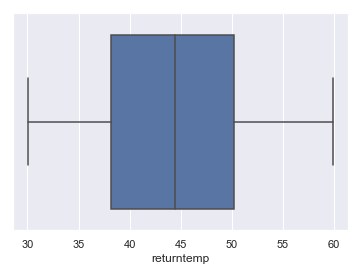

In [6]:
# Plot boxplot of 'returntemp' feature
sns.boxplot(x=imputedData['returntemp'])


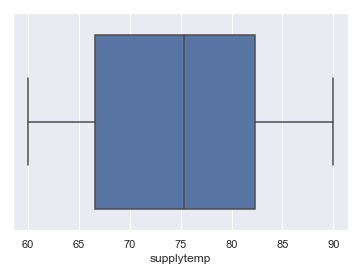

In [7]:
# Plot boxplot of 'supplytemp' feature
sns.boxplot(x=imputedData['supplytemp'])

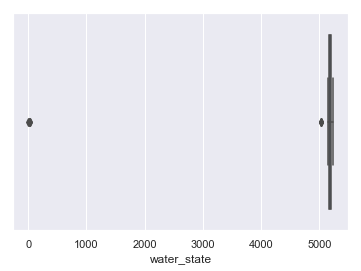

In [8]:
# Plot boxplot of 'water_state' feature
sns.boxplot(x=imputedData['water_state'])

##### Section 1.4.2: Detecting outiers using IQR outlier detection

In [9]:
# IQR outlier detection
data = imputedData['water_state']
q1,q3 = np.percentile(data,[25,75])
interQuartileRange = q3 - q1
lowerBound = q1 - (interQuartileRange*1.5)
upperBound = q3 + (interQuartileRange*1.5)
outlierIndices = np.where((data > upperBound)|(data < lowerBound))
print(outlierIndices)

(array([  3,  14,  29,  42,  44,  46,  58,  77,  82, 123, 131], dtype=int64),)


##### Section 1.4.3: Dropping outliers

In [10]:
# Dropping outliers from imputed data
imputedData2 = imputedData.drop([  3,  14,  29,  42,  44,  46,  58,  77,  82, 123, 131])
print(imputedData2)
# Reset dataset
imputedData2_reset = imputedData2.reset_index(drop=True)
print(imputedData2_reset)

     returntemp  supplytemp  water_state
0     37.341000   84.267000     5143.999
1     58.714000   77.914000     5144.165
2     39.888000   82.807000     5144.281
4     31.153000   87.821000     5145.665
5     56.389000   78.457000     5146.373
6     54.209000   73.945000     5146.479
7     49.498000   82.534000     5146.749
8     50.401000   60.987000     5147.465
9     57.336000   88.700000     5147.653
10    31.659000   62.852000     5148.196
11    30.697000   84.611000     5148.387
12    57.639000   82.439000     5148.998
13    49.571000   60.552000     5149.953
15    35.795000   81.957000     5150.768
16    42.593000   67.087000     5151.328
17    45.301000   87.646000     5151.779
18    32.275000   78.911000     5152.520
19    43.730000   69.268000     5153.199
20    44.296000   76.807000     5153.404
21    35.308000   78.628000     5153.565
22    44.473348   74.720449     5154.292
23    30.834000   70.962000     5154.756
24    40.900000   77.119000     5154.955
25    41.557000 

In [12]:
# Dropping outliers from datetime
dateTime = df[['datetime']].drop([  3,  14,  29,  42,  44,  46,  58,  77,  82, 123, 131])
print(dateTime)
# Reset datetime
dateTime_reset = dateTime.reset_index(drop=True)
print(dateTime_reset)

                datetime
0    2017-01-01 00:00:00
1    2017-01-01 01:00:00
2    2017-01-01 02:00:00
4    2017-01-01 04:00:00
5    2017-01-01 05:00:00
6    2017-01-01 06:00:00
7    2017-01-01 07:00:00
8    2017-01-01 08:00:00
9    2017-01-01 09:00:00
10   2017-01-01 10:00:00
11   2017-01-01 11:00:00
12   2017-01-01 12:00:00
13   2017-01-01 13:00:00
15   2017-01-01 15:00:00
16   2017-01-01 16:00:00
17   2017-01-01 17:00:00
18   2017-01-01 18:00:00
19   2017-01-01 19:00:00
20   2017-01-01 20:00:00
21   2017-01-01 21:00:00
22   2017-01-01 22:00:00
23   2017-01-01 23:00:00
24   2017-01-02 00:00:00
25   2017-01-02 01:00:00
26   2017-01-02 02:00:00
27   2017-01-02 03:00:00
28   2017-01-02 04:00:00
30   2017-01-02 06:00:00
31   2017-01-02 07:00:00
32   2017-01-02 08:00:00
..                   ...
138  2017-01-06 18:00:00
139  2017-01-06 19:00:00
140  2017-01-06 20:00:00
141  2017-01-06 21:00:00
142  2017-01-06 22:00:00
143  2017-01-06 23:00:00
144  2017-01-07 00:00:00
145  2017-01-07 01:00:00


In [13]:
# Concatenate datetime and imputed data
imputedData2_reset = pd.concat([dateTime_reset, imputedData2_reset], axis=1)
print(imputedData2_reset)

                datetime  returntemp  supplytemp  water_state
0    2017-01-01 00:00:00   37.341000   84.267000     5143.999
1    2017-01-01 01:00:00   58.714000   77.914000     5144.165
2    2017-01-01 02:00:00   39.888000   82.807000     5144.281
3    2017-01-01 04:00:00   31.153000   87.821000     5145.665
4    2017-01-01 05:00:00   56.389000   78.457000     5146.373
5    2017-01-01 06:00:00   54.209000   73.945000     5146.479
6    2017-01-01 07:00:00   49.498000   82.534000     5146.749
7    2017-01-01 08:00:00   50.401000   60.987000     5147.465
8    2017-01-01 09:00:00   57.336000   88.700000     5147.653
9    2017-01-01 10:00:00   31.659000   62.852000     5148.196
10   2017-01-01 11:00:00   30.697000   84.611000     5148.387
11   2017-01-01 12:00:00   57.639000   82.439000     5148.998
12   2017-01-01 13:00:00   49.571000   60.552000     5149.953
13   2017-01-01 15:00:00   35.795000   81.957000     5150.768
14   2017-01-01 16:00:00   42.593000   67.087000     5151.328
15   201

#### Section 1.5: Energy Consumption Estimation


##### Section 1.5.1: Calculating water consumption



In [14]:
# Calculating water consumption
rowSize = imputedData2_reset.shape[0]
waterConsumption = [0] * rowSize
water_state = imputedData2_reset['water_state'].values
for i in range(0, rowSize-1):
    waterConsumption[i] = water_state[i+1] - water_state[i]
imputedData2_reset['water_consumption'] = pd.DataFrame(waterConsumption)
print(imputedData2_reset)

                datetime  returntemp  supplytemp  water_state  \
0    2017-01-01 00:00:00   37.341000   84.267000     5143.999   
1    2017-01-01 01:00:00   58.714000   77.914000     5144.165   
2    2017-01-01 02:00:00   39.888000   82.807000     5144.281   
3    2017-01-01 04:00:00   31.153000   87.821000     5145.665   
4    2017-01-01 05:00:00   56.389000   78.457000     5146.373   
5    2017-01-01 06:00:00   54.209000   73.945000     5146.479   
6    2017-01-01 07:00:00   49.498000   82.534000     5146.749   
7    2017-01-01 08:00:00   50.401000   60.987000     5147.465   
8    2017-01-01 09:00:00   57.336000   88.700000     5147.653   
9    2017-01-01 10:00:00   31.659000   62.852000     5148.196   
10   2017-01-01 11:00:00   30.697000   84.611000     5148.387   
11   2017-01-01 12:00:00   57.639000   82.439000     5148.998   
12   2017-01-01 13:00:00   49.571000   60.552000     5149.953   
13   2017-01-01 15:00:00   35.795000   81.957000     5150.768   
14   2017-01-01 16:00:00 

In [15]:
# Checking that there is no such thing as negative consumption
negativeWaterConsumptionIndices = np.where(imputedData2_reset['water_consumption']<0)
print(negativeWaterConsumptionIndices)

(array([], dtype=int64),)


##### Section 1.5.2: Calculating energy consumption



In [16]:
C = 1.16
energyConsumption= [0] * 157
waterConsumption = imputedData2_reset['water_consumption'].values
supplyTemp = imputedData2_reset['supplytemp'].values
returnTemp = imputedData2_reset['returntemp'].values
for i in range(0, 156):
    energyConsumption[i] = waterConsumption[i] * (supplyTemp[i] - returnTemp[i]) * C
imputedData2_reset['energy_consumption'] = pd.DataFrame(energyConsumption)
print(imputedData2_reset)

                datetime  returntemp  supplytemp  water_state  \
0    2017-01-01 00:00:00   37.341000   84.267000     5143.999   
1    2017-01-01 01:00:00   58.714000   77.914000     5144.165   
2    2017-01-01 02:00:00   39.888000   82.807000     5144.281   
3    2017-01-01 04:00:00   31.153000   87.821000     5145.665   
4    2017-01-01 05:00:00   56.389000   78.457000     5146.373   
5    2017-01-01 06:00:00   54.209000   73.945000     5146.479   
6    2017-01-01 07:00:00   49.498000   82.534000     5146.749   
7    2017-01-01 08:00:00   50.401000   60.987000     5147.465   
8    2017-01-01 09:00:00   57.336000   88.700000     5147.653   
9    2017-01-01 10:00:00   31.659000   62.852000     5148.196   
10   2017-01-01 11:00:00   30.697000   84.611000     5148.387   
11   2017-01-01 12:00:00   57.639000   82.439000     5148.998   
12   2017-01-01 13:00:00   49.571000   60.552000     5149.953   
13   2017-01-01 15:00:00   35.795000   81.957000     5150.768   
14   2017-01-01 16:00:00 

#### Section 1.6: Saving final dataframe in csv format in the same folder as input data



In [17]:
import os
path = os.path.dirname(inputFile)
imputedData2_reset.to_csv(path+'/output.csv')

### Chapter 2: Discussion Task

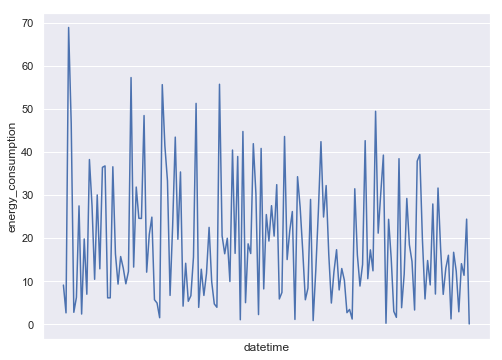

In [18]:
# Task 2
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
fig = plt.plot(imputedData2_reset['datetime'], imputedData2_reset['energy_consumption'])
plt.xticks([])
plt.xlabel('datetime')
plt.ylabel('energy_consumption')
plt.savefig(path+'/timeseries_plot.png')
plt.show()